In [27]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.3.0'

In [28]:
#Build network with vgg and train on rock paper scissors dataset
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

--2020-08-29 21:47:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.28.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.1’

rps.zip.1           100%[===================>] 191.38M   132MB/s    in 1.4s    

2020-08-29 21:47:29 (132 MB/s) - ‘rps.zip.1’ saved [200682221/200682221]



In [29]:
!unzip rps.zip -d 'sample_data'

In [4]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

--2020-08-29 20:40:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    100%[===================>]  28.15M  86.2MB/s    in 0.3s    

2020-08-29 20:40:37 (86.2 MB/s) - ‘rps-test-set.zip’ saved [29516758/29516758]



In [5]:
!unzip rps-test-set.zip -d 'sample_data'

Archive:  rps-test-set.zip
   creating: sample_data/rps-test-set/paper/
  inflating: sample_data/rps-test-set/paper/testpaper01-00.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-01.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-02.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-03.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-04.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-05.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-06.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-07.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-08.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-09.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-10.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-11.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-12.png  
  inflating: sample_data/rps-test-set/paper/testpaper01-13.png  
  inflating: sampl

In [30]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob


In [32]:
Image_shape = [150,150]

epochs = 40
batch_size = 35
training_dir = 'sample_data/rps'
test_dir = 'sample_data/rps-test-set'

training_imgs = glob(training_dir + '/*/*.png')
test_imgs = glob(test_dir + '/*/*.png')

num_classes = glob(training_dir + '/*')

print(len(training_imgs))
print(len(test_imgs))
print(len(num_classes))


2520
372
3


In [33]:
#Creating model
vgg16 = VGG16(include_top=False,weights='imagenet',input_shape=Image_shape + [3])

#Freezing layer weights
for layer in vgg16.layers:
  layer.trainable = False

i = Flatten()(vgg16.output)
#3 classes from len(num_classes)
x = Dense(3,activation='softmax')(i)

model = Model(vgg16.input,x)

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])



In [34]:
#Creating our image generator
gen = ImageDataGenerator(rotation_range=0.2,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip = True,
                         vertical_flip=True,
                         preprocessing_function=preprocess_input)



In [35]:
#Creating the training gen
training_gen = gen.flow_from_directory(training_dir,
                                       Image_shape,
                                       batch_size=batch_size,
                                       shuffle = True)

#Creating the test_gen
test_gen = gen.flow_from_directory(test_dir,
                                   Image_shape,
                                   batch_size=batch_size,
                                   shuffle = True)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [38]:
mod = model.fit_generator(training_gen,
                          epochs=epochs,
                          steps_per_epoch=2520//batch_size,
                          validation_data=test_gen,
                          validation_steps = 372//batch_size
                        )

Epoch 1/40
72/72 [==============================] - 24s 339ms/step - loss: 0.4057 - accuracy: 0.9448 - val_loss: 2.2828 - val_accuracy: 0.8086
Epoch 2/40
72/72 [==============================] - 24s 335ms/step - loss: 0.3256 - accuracy: 0.9591 - val_loss: 2.0138 - val_accuracy: 0.8114
Epoch 3/40
72/72 [==============================] - 24s 335ms/step - loss: 0.1657 - accuracy: 0.9726 - val_loss: 0.9865 - val_accuracy: 0.9000
Epoch 4/40
72/72 [==============================] - 24s 336ms/step - loss: 0.2185 - accuracy: 0.9734 - val_loss: 3.7977 - val_accuracy: 0.7771
Epoch 5/40
72/72 [==============================] - 24s 334ms/step - loss: 0.1574 - accuracy: 0.9778 - val_loss: 1.5733 - val_accuracy: 0.8600
Epoch 6/40
72/72 [==============================] - 24s 333ms/step - loss: 0.1243 - accuracy: 0.9810 - val_loss: 2.4737 - val_accuracy: 0.8314
Epoch 7/40
72/72 [==============================] - 24s 337ms/step - loss: 0.1318 - accuracy: 0.9865 - val_loss: 2.2504 - val_accuracy: 0.8543

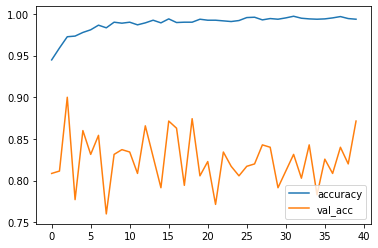

In [39]:
import matplotlib.pyplot as plt
plt.plot(mod.history['accuracy'],label='accuracy')
plt.plot(mod.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

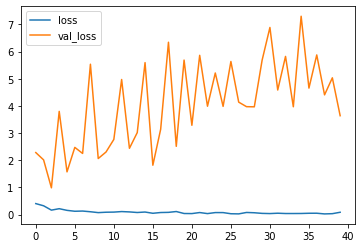

In [40]:
plt.plot(mod.history['loss'],label='loss')
plt.plot(mod.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [41]:
model.save('rps_model.h5')